## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

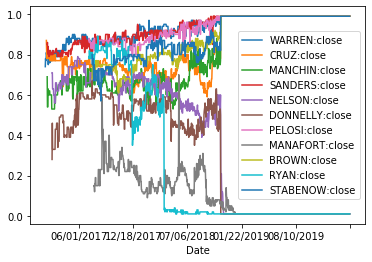

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2019')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## Environment

In [11]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [12]:
env.feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

#### ^An environment doesn't just show the OHLCV for each instrument. It also shows free, locked, total, as well as "USD_BTC"

## Using 123's Ray example

In [13]:
#Add the deeptrader path to ALL workers, not just the current worker
import os
parent_dir = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader"
os.environ["PYTHONPATH"] = parent_dir + ":" + os.environ.get("PYTHONPATH", "")

In [14]:
#Try and get rid of that yaml warning (although this only does it for THIS worker)
import yaml
yaml.warnings({'YAMLLoadWarning': False})

In [15]:
#Import tensortrade
import tensortrade

# Define Exchanges
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream


# Define External Data Feed (features)
import ta
from sklearn import preprocessing
from tensortrade.data import DataFeed, Module

# Portfolio
from tensortrade.instruments import USD, BTC
from tensortrade.wallets import Wallet, Portfolio
from tensortrade.actions import ManagedRiskOrders
from gym.spaces import Discrete

# Environment
from tensortrade.environments import TradingEnvironment


import gym
import ray
from ray import tune
from ray.tune import grid_search
from ray.tune.registry import register_env

import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from tensortrade.rewards import RiskAdjustedReturns
    
class RayTradingEnv(TradingEnvironment):
    def __init__(self):        
        env = TradingEnvironment(
            feed=feed,
            portfolio=portfolio,
            action_scheme="simple",
            reward_scheme="simple",
            window_size=15,
            enable_logger=False,
            renderers = 'screenlog'
        ) 
        self.env = env
        self.action_space = self.env.action_space
        self.observation_space = self.env.observation_space
        

    def reset(self):
        return self.env.reset()

    def step(self, action):
        return self.env.step(action)

def env_creator(env_config):
    return RayTradingEnv()

register_env("ray_trading_env", env_creator)

ray.init(ignore_reinit_error=True)

2020-03-05 22:55:33,785	INFO resource_spec.py:212 -- Starting Ray with 5.66 GiB memory available for workers and up to 2.85 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-05 22:55:34,165	INFO services.py:1078 -- View the Ray dashboard at localhost:8266


{'node_ip_address': '192.168.0.179',
 'redis_address': '192.168.0.179:35902',
 'object_store_address': '/tmp/ray/session_2020-03-05_22-55-33_775622_38780/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-03-05_22-55-33_775622_38780/sockets/raylet',
 'webui_url': 'localhost:8266',
 'session_dir': '/tmp/ray/session_2020-03-05_22-55-33_775622_38780'}

## Train using the tune way (better so far)

In [16]:
analysis = tune.run(
        "DQN",
        name = "DQN10-paralellism",
        checkpoint_at_end=True,
        stop={
            "timesteps_total": 10000,
        },
        config={
            "env": "ray_trading_env",
            "lr": grid_search([1e-4, 1e-6]),  # try different lrs
            "num_workers": 6,  # parallelism,
            "eager": "true"

        },
    )

Trial name,status,loc,lr
DQN_ray_trading_env_54fd0cc0,RUNNING,,
DQN_ray_trading_env_550177c6,PENDING,,


(pid=38804) 2020-03-05 22:55:39,356	INFO trainer.py:417 -- Executing eagerly, with eager_tracing=False
(pid=38804) 2020-03-05 22:55:40,898	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:
(pid=38804) 
(pid=38804) WARN: Box bound precision lowered by casting to float32
(pid=38804) 
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=38804) 
(pid=38804) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=38804) 
(pid=38804) 2020-03-05 22:55:41,573	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=38805) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/

Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-56-04
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 2
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 364.667
    update_time_ms: 5.73
  iterations_since_restore: 1
  node_ip: 192.168.0.179
  num_healthy_workers: 6
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 72.33823529411765
    ram_util_percent: 67.07352941176471
  pid: 38804
  policy_reward_max: {}
  policy_reward_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,nan,23.3236,1008,1
DQN_ray_trading_env_550177c6,PENDING,,,,,,


(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38804) 
(pid=38804) Mean of empty slice.
(pid=38804) 
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38804) 
(pid=38804) invalid value encountered in double_scalars
(pid=38804) 


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-56-24
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    grad_time_ms: 51.087
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 4.19030237197876
        mean_q: 2.772604465484619
        mean_td_error: 0.1657620221376419
        min_q: 1.0888044834136963
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 626.384
    opt_samples: 32.0
    replay_time_ms: 4.658
    sample_time_ms: 445.128
    update_time_ms: 5.775
  iterations_since_restore: 2
  node_i

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,nan,43.1408,2016,2
DQN_ray_trading_env_550177c6,PENDING,,,,,,



(pid=38804) 
(pid=38804) Mean of empty slice.
(pid=38804) 
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38804) 
(pid=38804) invalid value encountered in double_scalars
(pid=38804) 


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-56-46
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    grad_time_ms: 52.058
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 6.677640438079834
        mean_q: 4.772562503814697
        mean_td_error: 0.2751474976539612
        min_q: 3.075944423675537
    num_steps_sampled: 3024
    num_steps_trained: 2688
    num_target_updates: 6
    opt_peak_throughput: 614.695
    opt_samples: 32.0
    replay_time_ms: 4.182
    sample_time_ms: 457.007
    update_time_ms: 5.582
  iterations_since_restore: 3
  node_ip: 192

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,nan,64.5507,3024,3
DQN_ray_trading_env_550177c6,PENDING,,,,,,


(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38804) 
(pid=38804) Mean of empty slice.
(pid=38804) 
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38804) 
(pid=38804) invalid value encountered in double_scalars
(pid=38804) 


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-57-10
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    grad_time_ms: 53.938
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 8.979501724243164
        mean_q: 6.3473052978515625
        mean_td_error: 0.36779317259788513
        min_q: 2.968257427215576
    num_steps_sampled: 4032
    num_steps_trained: 4032
    num_target_updates: 8
    opt_peak_throughput: 593.271
    opt_samples: 32.0
    replay_time_ms: 3.913
    sample_time_ms: 518.148
    update_time_ms: 5.437
  iterations_since_restore: 4
  node

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,nan,88.4242,4032,4
DQN_ray_trading_env_550177c6,PENDING,,,,,,


(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38804) 
(pid=38804) Mean of empty slice.
(pid=38804) 
(pid=38804) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38804) 
(pid=38804) invalid value encountered in double_scalars
(pid=38804) 
Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-57-31
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.598556729964192
  episode_reward_mean: -0.10892388330341153
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 6
  episodes_total: 6
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    grad_time_ms: 55.733
    le

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,-0.108924,109.506,5040,5
DQN_ray_trading_env_550177c6,PENDING,,,,,,


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-57-51
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.598556729964192
  episode_reward_mean: -0.10892388330341153
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    grad_time_ms: 55.721
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 11.975228309631348
        mean_q: 9.708728790283203
        mean_td_error: 0.4865461587905884
        min_q: 6.5029706954956055
    num_steps_sampled: 6048
    num_steps_trained: 6720
    num_target_updates: 12
    opt_peak_throughput: 574.293
    opt_samples: 32.0
    replay_time_ms: 4.258
    sample_time_ms: 407.868
    update_time_

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,-0.108924,129.953,6048,6
DQN_ray_trading_env_550177c6,PENDING,,,,,,


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-58-13
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.598556729964192
  episode_reward_mean: -0.10892388330341153
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    grad_time_ms: 56.277
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.358649253845215
        mean_q: 9.946855545043945
        mean_td_error: 0.1408846378326416
        min_q: 4.775174140930176
    num_steps_sampled: 7056
    num_steps_trained: 8064
    num_target_updates: 14
    opt_peak_throughput: 568.618
    opt_samples: 32.0
    replay_time_ms: 4.361
    sample_time_ms: 471.268
    update_time_m

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,-0.108924,151.492,7056,7
DQN_ray_trading_env_550177c6,PENDING,,,,,,


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-58-36
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.598556729964192
  episode_reward_mean: -0.10892388330341153
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    grad_time_ms: 54.014
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.62179183959961
        mean_q: 10.567303657531738
        mean_td_error: 0.026596173644065857
        min_q: 5.751020908355713
    num_steps_sampled: 8064
    num_steps_trained: 9408
    num_target_updates: 16
    opt_peak_throughput: 592.444
    opt_samples: 32.0
    replay_time_ms: 3.636
    sample_time_ms: 468.264
    update_time_ms: 6

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,-0.108924,174.828,8064,8
DQN_ray_trading_env_550177c6,PENDING,,,,,,


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-58-59
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 0.7189155121594923
  episode_reward_mean: 0.06433045398873882
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 6
  episodes_total: 12
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    grad_time_ms: 56.33
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 12.450089454650879
        mean_q: 10.330806732177734
        mean_td_error: 0.024271950125694275
        min_q: 4.388367176055908
    num_steps_sampled: 9072
    num_steps_trained: 10752
    num_target_updates: 18
    opt_peak_throughput: 568.076
    opt_samples: 32.0
    rep

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,0.0643305,197.796,9072,9
DQN_ray_trading_env_550177c6,PENDING,,,,,,


Result for DQN_ray_trading_env_54fd0cc0:
  custom_metrics: {}
  date: 2020-03-05_22-59-18
  done: true
  episode_len_mean: 733.0
  episode_reward_max: 0.7189155121594923
  episode_reward_mean: 0.06433045398873881
  episode_reward_min: -0.7715215407033434
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: f4733e5a42aa49cd82f3ed7f4ff9ec25
  experiment_tag: 0_lr=0.0001
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    grad_time_ms: 59.005
    learner:
      default_policy:
        cur_lr: 9.999999747378752e-05
        max_q: 13.70273494720459
        mean_q: 9.322200775146484
        mean_td_error: 0.19416654109954834
        min_q: 5.176931858062744
    num_steps_sampled: 10080
    num_steps_trained: 12096
    num_target_updates: 20
    opt_peak_throughput: 542.331
    opt_samples: 32.0
   

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,RUNNING,192.168.0.179:38804,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,PENDING,,,,,,


2020-03-05 22:59:19,501	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff9b1908ea0100.
2020-03-05 22:59:19,524	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff54761bfd0100.
2020-03-05 22:59:19,525	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff2512146c0100.
2020-03-05 22:59:19,527	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff4d81fd5d0100.
2020-03-05 22:59:19,538	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff7a78cec90100.
2020-03-05 22:59:19,550	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffffd03b8d120100.
2020-03-05 22:59:24,076	ERROR worker.py:998 -- Possible unhandled error from worker: ray::DQN.stop() (pid=38804, ip=192.168.0.179)
  File "python/ray/_raylet.pyx", line 452, in ray._raylet.execute_task
  File "python/ray/_rayl

(pid=38802) 2020-03-05 22:59:24,484	INFO trainer.py:417 -- Executing eagerly, with eager_tracing=False
(pid=38802) 2020-03-05 22:59:26,991	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:
(pid=38802) 
(pid=38802) WARN: Box bound precision lowered by casting to float32
(pid=38802) 
(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:
(pid=38802) 
(pid=38802) calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
(pid=38802) 
(pid=38802) 2020-03-05 22:59:27,644	WARNING util.py:37 -- Install gputil for GPU system monitoring.
(pid=38862) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/

Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_22-59-54
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    - 0.999902
    grad_time_ms: .nan
    learner: {}
    num_steps_sampled: 1008
    num_steps_trained: 0
    num_target_updates: 2
    opt_peak_throughput: 0.0
    opt_samples: .nan
    replay_time_ms: .nan
    sample_time_ms: 354.73
    update_time_ms: 6.517
  iterations_since_restore: 1
  node_ip: 192.168.0.179
  num_healthy_workers: 6
  off_policy_estimator: {}
  perf:
    cpu_util_percent: 75.6
    ram_util_percent: 66.51842105263158
  pid: 38802
  policy_reward_max: {}
  policy_reward_mean: {}
  pol

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,nan,26.385,1008,1


(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38802) 
(pid=38802) Mean of empty slice.
(pid=38802) 
(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38802) 
(pid=38802) invalid value encountered in double_scalars
(pid=38802) 


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-00-13
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    - 0.983634
    grad_time_ms: 50.423
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.633530616760254
        mean_q: 0.41779249906539917
        mean_td_error: -1.106017827987671
        min_q: -1.3200273513793945
    num_steps_sampled: 2016
    num_steps_trained: 1344
    num_target_updates: 4
    opt_peak_throughput: 634.635
    opt_samples: 32.0
    replay_time_ms: 4.206
    sample_time_ms: 393.655
    update_time_ms: 5.394
  iterations_since_restore: 2
  nod

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,nan,45.8495,2016,2


(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:
(pid=38802) 
(pid=38802) Mean of empty slice.
(pid=38802) 
(pid=38802) /Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning:
(pid=38802) 
(pid=38802) invalid value encountered in double_scalars
(pid=38802) 


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-00-35
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    - 0.88485
    grad_time_ms: 51.425
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.2109410762786865
        mean_q: 0.512370228767395
        mean_td_error: -1.1092898845672607
        min_q: -0.8822310566902161
    num_steps_sampled: 3024
    num_steps_trained: 2688
    num_target_updates: 6
    opt_peak_throughput: 622.264
    opt_samples: 32.0
    replay_time_ms: 4.147
    sample_time_ms: 449.767
    update_time_ms: 5.127
  iterations_since_restore: 3
  node_ip: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,nan,67.81,3024,3


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-00-59
  done: false
  episode_len_mean: .nan
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    - 0.786066
    grad_time_ms: 54.537
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 1.6729683876037598
        mean_q: 0.5726745128631592
        mean_td_error: -1.1620384454727173
        min_q: -0.8385533690452576
    num_steps_sampled: 4032
    num_steps_trained: 4032
    num_target_updates: 8
    opt_peak_throughput: 586.761
    opt_samples: 32.0
    replay_time_ms: 4.174
    sample_time_ms: 517.598
    update_time_ms: 5.265
  iterations_since_restore: 4
  no

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,nan,91.3183,4032,4


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-01-19
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: 0.11919453274859448
  episode_reward_min: -0.23165389402176717
  episodes_this_iter: 6
  episodes_total: 6
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    - 0.687282
    grad_time_ms: 54.823
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.069572925567627
        mean_q: 0.44070908427238464
        mean_td_error: -1.2947337627410889
        min_q: -0.7658215761184692
    num_steps_sampled: 5040
    num_steps_trained: 5376
    num_target_updates: 10
    opt_peak_throughput: 583.701
    opt_samples: 32.0
    replay_time_ms: 3.785
    sample_time_ms: 386.528
    update_tim

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,0.119195,111.768,5040,5


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-01-39
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: 0.11919453274859448
  episode_reward_min: -0.23165389402176717
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    - 0.588498
    grad_time_ms: 56.044
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.5373945236206055
        mean_q: 0.6600720882415771
        mean_td_error: -0.9923533201217651
        min_q: -1.0906894207000732
    num_steps_sampled: 6048
    num_steps_trained: 6720
    num_target_updates: 12
    opt_peak_throughput: 570.985
    opt_samples: 32.0
    replay_time_ms: 4.466
    sample_time_ms: 431.052
    update_tim

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,0.119195,131.249,6048,6


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-02-03
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: 0.11919453274859448
  episode_reward_min: -0.23165389402176717
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    - 0.489714
    grad_time_ms: 55.052
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.4820213317871094
        mean_q: 0.8249763250350952
        mean_td_error: -1.0531365871429443
        min_q: -0.36022648215293884
    num_steps_sampled: 7056
    num_steps_trained: 8064
    num_target_updates: 14
    opt_peak_throughput: 581.27
    opt_samples: 32.0
    replay_time_ms: 3.954
    sample_time_ms: 456.73
    update_time

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,0.119195,155.637,7056,7


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-02-33
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: 0.11919453274859448
  episode_reward_min: -0.23165389402176717
  episodes_this_iter: 0
  episodes_total: 6
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    - 0.39093
    grad_time_ms: 62.162
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.0994300842285156
        mean_q: 0.9066178798675537
        mean_td_error: -1.0313382148742676
        min_q: -0.7589343786239624
    num_steps_sampled: 8064
    num_steps_trained: 9408
    num_target_updates: 16
    opt_peak_throughput: 514.787
    opt_samples: 32.0
    replay_time_ms: 4.478
    sample_time_ms: 625.148
    update_time_ms: 

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,0.119195,185.277,8064,8


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-03-00
  done: false
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: -0.024658700230250036
  episode_reward_min: -0.49319382944782075
  episodes_this_iter: 6
  episodes_total: 12
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    - 0.2921459999999999
    grad_time_ms: 53.517
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 2.8789072036743164
        mean_q: 1.1275427341461182
        mean_td_error: -0.9586400985717773
        min_q: -0.5584519505500793
    num_steps_sampled: 9072
    num_steps_trained: 10752
    num_target_updates: 18
    opt_peak_throughput: 597.946
    opt_samples: 32.0
    

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,-0.0246587,212.492,9072,9


Result for DQN_ray_trading_env_550177c6:
  custom_metrics: {}
  date: 2020-03-05_23-03-23
  done: true
  episode_len_mean: 733.0
  episode_reward_max: 1.109493634617405
  episode_reward_mean: -0.024658700230250036
  episode_reward_min: -0.49319382944782075
  episodes_this_iter: 0
  episodes_total: 12
  experiment_id: 54decce6f26e4f3da365da7323551e07
  experiment_tag: 1_lr=1e-06
  hostname: MacBook-Pro-104.local
  info:
    exploration_infos:
    - 0.999902
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    - 0.19336199999999992
    grad_time_ms: 56.434
    learner:
      default_policy:
        cur_lr: 9.999999974752427e-07
        max_q: 3.2319273948669434
        mean_q: 1.1122875213623047
        mean_td_error: -1.0071473121643066
        min_q: -0.766086757183075
    num_steps_sampled: 10080
    num_steps_trained: 12096
    num_target_updates: 20
    opt_peak_throughput: 567.038
    opt_samples: 32.0

Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,RUNNING,192.168.0.179:38802,1e-06,-0.0246587,235.528,10080,10


Trial name,status,loc,lr,reward,total time (s),ts,iter
DQN_ray_trading_env_54fd0cc0,TERMINATED,,0.0001,0.0643305,217.183,10080,10
DQN_ray_trading_env_550177c6,TERMINATED,,1e-06,-0.0246587,235.528,10080,10


2020-03-05 23:03:23,511	INFO tune.py:352 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.
2020-03-05 23:03:23,967	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff1bf2e33e0100.
2020-03-05 23:03:23,980	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffffb9972b6b0100.
2020-03-05 23:03:24,004	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffffcb8d4b6c0100.
2020-03-05 23:03:24,016	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff498ce12a0100.
2020-03-05 23:03:24,017	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff7fa695750100.
2020-03-05 23:03:24,019	WARNING worker.py:1058 -- A worker died or was killed while executing task ffffffffffffffff9a0893510100.
2020-03-05 23:03:28,531

In [ ]:
#Use the below command to see results on Tensorbard
#tensorboard --logdir=/Users/jasonfiacco/ray_results/DQN2

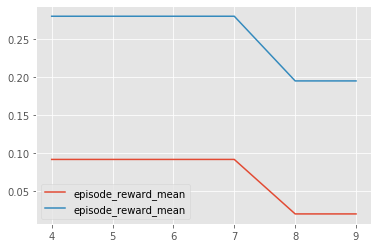

In [19]:
#Now you can plot the reward results of your tuner (same thing shows up in Tensorboard)
dfs = analysis.trial_dataframes

ax = None
for d in dfs.values():
    ax = d.episode_reward_mean.plot(ax=ax, legend=True)

## Restoring an already existing agent that I tuned

In [20]:
#First set up the trainer (which should really be called the "tester")

config = dqn.DEFAULT_CONFIG.copy()
config["num_gpus"] = 0
#config["num_workers"] = 4

#config["num_envs_per_worker"] = 8
# config["eager"] = False

# config["timesteps_per_iteration"] = 100
# config["train_batch_size"] = 20

#config['log_level'] = "DEBUG"

trainer = dqn.DQNTrainer(config=config, env="ray_trading_env")

config

2020-03-05 22:48:58,240	INFO trainer.py:420 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-03-05 22:48:58,265	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/ray/rllib/utils/from_config.py:134: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

2020-03-05 22:48:59,941	WARNING util.py:37 -- Install gputil for GPU system monitoring.


{'num_workers': 0,
 'num_envs_per_worker': 1,
 'sample_batch_size': 4,
 'batch_mode': 'truncate_episodes',
 'num_gpus': 0,
 'train_batch_size': 32,
 'model': {'conv_filters': None,
  'conv_activation': 'relu',
  'fcnet_activation': 'tanh',
  'fcnet_hiddens': [256, 256],
  'free_log_std': False,
  'no_final_linear': False,
  'vf_share_layers': True,
  'use_lstm': False,
  'max_seq_len': 20,
  'lstm_cell_size': 256,
  'lstm_use_prev_action_reward': False,
  'state_shape': None,
  'framestack': True,
  'dim': 84,
  'grayscale': False,
  'zero_mean': True,
  'custom_model': None,
  'custom_action_dist': None,
  'custom_options': {},
  'custom_preprocessor': None},
 'optimizer': {},
 'gamma': 0.99,
 'horizon': None,
 'soft_horizon': False,
 'no_done_at_end': False,
 'env_config': {},
 'env': None,
 'normalize_actions': False,
 'clip_rewards': None,
 'clip_actions': True,
 'preprocessor_pref': 'deepmind',
 'lr': 0.0005,
 'monitor': False,
 'log_level': 'WARN',
 'callbacks': {'on_episode_star

In [21]:
#Now restore the agent by quering the directory of the best agent from the recent tune run.
import os
logdir = analysis.get_best_logdir("episode_reward_mean", mode="max")
trainer.restore(os.path.join(logdir, "checkpoint_10/checkpoint-10"))

2020-03-05 22:49:17,645	WARNING trainable.py:210 -- Getting current IP.
2020-03-05 22:49:17,646	INFO trainable.py:416 -- Restored on 192.168.0.179 from checkpoint: /Users/jasonfiacco/ray_results/DQN10-paralellism/DQN_ray_trading_env_3ed2254a_1_lr=1e-06_2020-03-05_22-44-25b8bbhfkd/checkpoint_10/checkpoint-10
2020-03-05 22:49:17,647	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': 10080, '_time_total': 201.15877509117126, '_episodes_total': 12}


## Testing (test on a new or the same environment)

In [22]:
#Set up a testing environment with test data.
test_env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env2/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [23]:
#Run the test. One episode only.
for episode_num in range(1):
    state = test_env.reset()
    done = False
    cumulative_reward = 0
    step = 0
    action = trainer.compute_action(state)

    while not done:
        action = trainer.compute_action(state)
        state, reward, done, results = test_env.step(action)

        cumulative_reward += reward
        
        #Render every 100 steps:
        if step % 100 == 0:
            test_env.render()
            
        step += 1
        
print("Cumulative reward: ", cumulative_reward)

[2020-03-05 10:49:27 PM] Step: 1
[2020-03-05 10:49:30 PM] Step: 101
[2020-03-05 10:49:33 PM] Step: 201
[2020-03-05 10:49:36 PM] Step: 301
[2020-03-05 10:49:39 PM] Step: 401
[2020-03-05 10:49:42 PM] Step: 501
[2020-03-05 10:49:45 PM] Step: 601
[2020-03-05 10:49:48 PM] Step: 701
Cumulative reward:  0.21964809467818147


## Plot

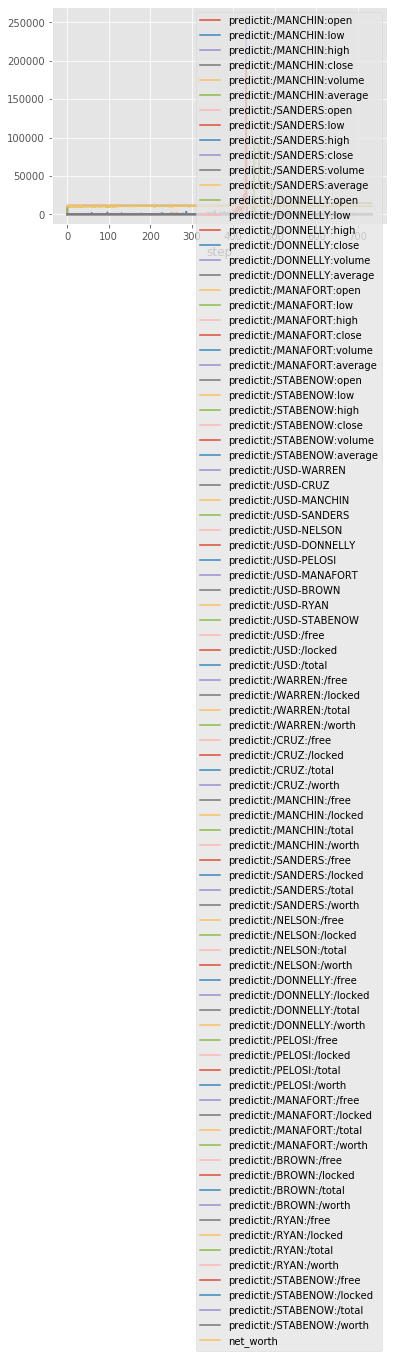

In [24]:
%matplotlib inline

portfolio.performance.plot()

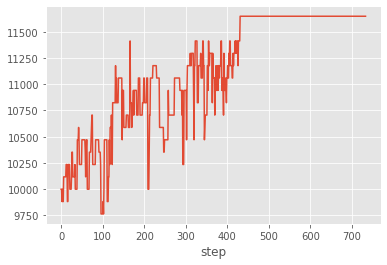

In [25]:
portfolio.performance.net_worth.plot()

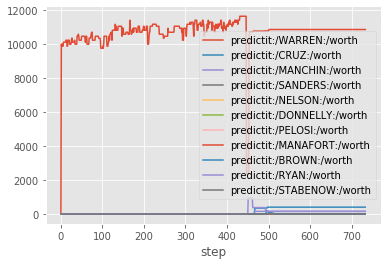

In [27]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, :].plot()


## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)